In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# DATA LOADING

In [3]:
df=pd.read_csv(r"C:\Users\HP\Downloads\adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# DATA CLEANING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df = df.replace('?', np.nan)

In [7]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [10]:
df.shape

(30162, 15)

# EXPLORATORY DATA ANALYSIS

## Pie plot for visualizing the distribution of Income

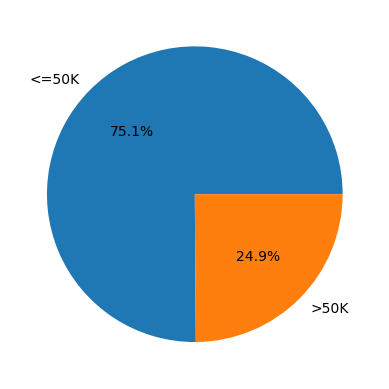

In [12]:
count=df['income'].value_counts()
plt.pie(count,labels=count.index,autopct='%1.1f%%')
plt.show()

<p>insight- The pie chart reveals that 75.1% of individuals earn ≤50K, indicating that a large majority of the population falls into the lower-income group. This highlights a substantial income imbalance, where only a smaller portion of individuals earn more than 50K. The distribution suggests that higher-income earners represent a minority, emphasizing a skew toward lower earnings in the dataset.</p>

## Density plot for visualizing the distribution of Age

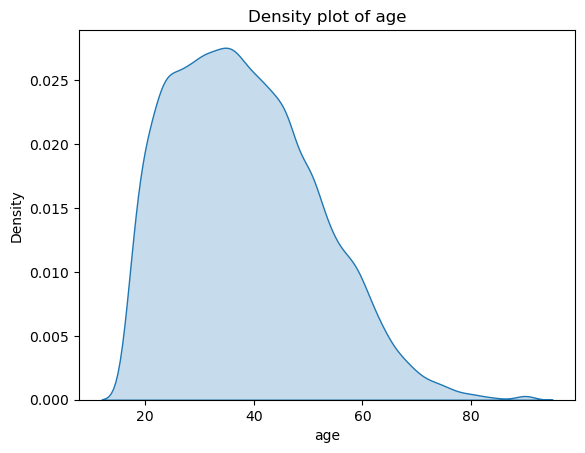

In [11]:
sns.kdeplot(df['age'],fill=True)
plt.title('Density plot of age')
plt.show()

<p>inference- The density plot indicates that the majority of individuals fall within the 20 to 60 age range, showing a strong concentration of data in this interval. This suggests that the dataset is dominated by the working-age population, with fewer observations among younger (<20) and older (>60) age groups. The distribution highlights a peak around the mid-age range, reflecting where most participants or respondents are clustered.</p>

## Count plot for visualizing the distribution of Native country

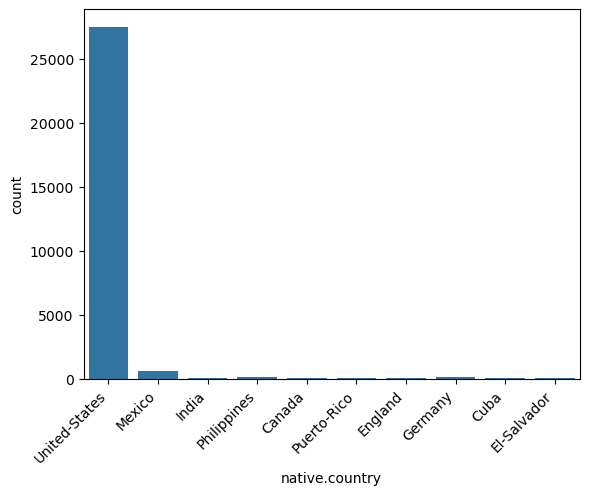

In [13]:
top_n = 10
top_categories = df['native.country'].value_counts().nlargest(top_n).index
df_top = df[df['native.country'].isin(top_categories)]


sns.countplot(data=df_top, x='native.country')
plt.xticks(rotation=45,ha='right')
plt.show()

<p>insight- The countplot shows that the vast majority of individuals are native to the United States, with all other countries contributing only a small fraction of the observations. This indicates that the dataset is heavily dominated by U.S. natives, which may influence overall trends and limit the representation of other nationalities.</p>

## Pie plot for visualizing the distribution of Mariatal status

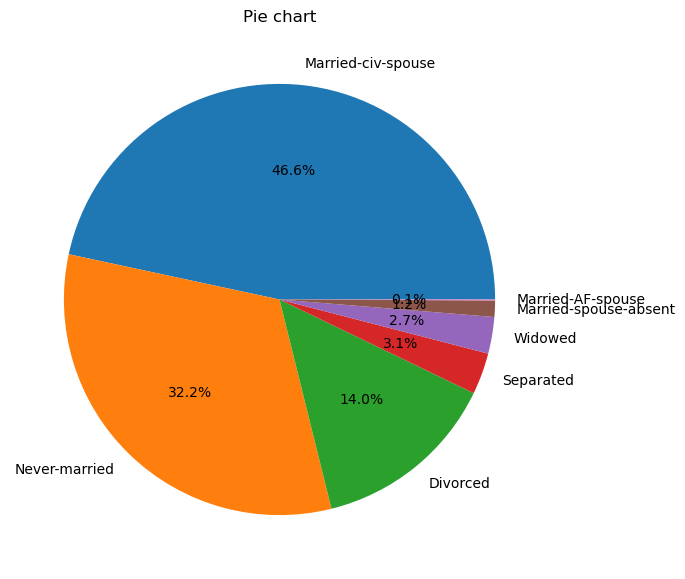

In [14]:
plt.figure(figsize=(10,7))
count=df['marital.status'].value_counts()
plt.pie(count,labels=count.index,autopct='%1.1f%%')
plt.title('Pie chart')
plt.show()

<p>insight- The pie chart indicates that 46% of individuals are married with a civil spouse, making it the largest marital group in the dataset. This is followed by 32.8% who have never married, representing a substantial portion of the population. Additionally, 13.6% are divorced, highlighting a smaller yet notable segment. Overall, the distribution suggests that married individuals form the majority, while a significant share of the population remains unmarried, and a comparatively smaller group is divorced.</p>

## Count plot for visualizing the distribution of Sex

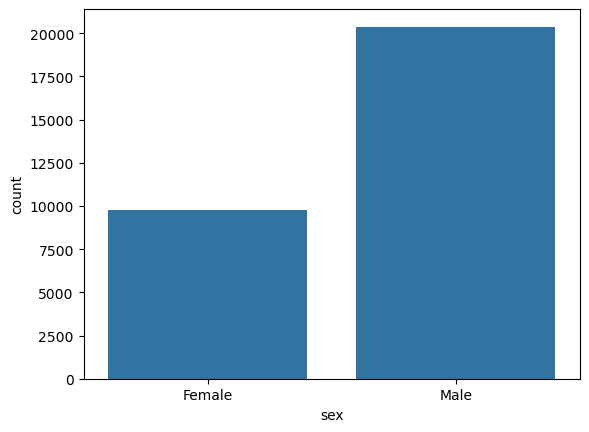

In [15]:
sns.countplot(x='sex',data=df)
plt.show()

<p>insight- The countplot shows that the number of males is noticeably higher than the number of females in the dataset. This indicates a gender imbalance, with males forming the dominant group. Such a distribution may influence overall trends or outcomes in the analysis, as male representation is significantly larger.</p>

## Count plot for visualizing distribution of Educational level

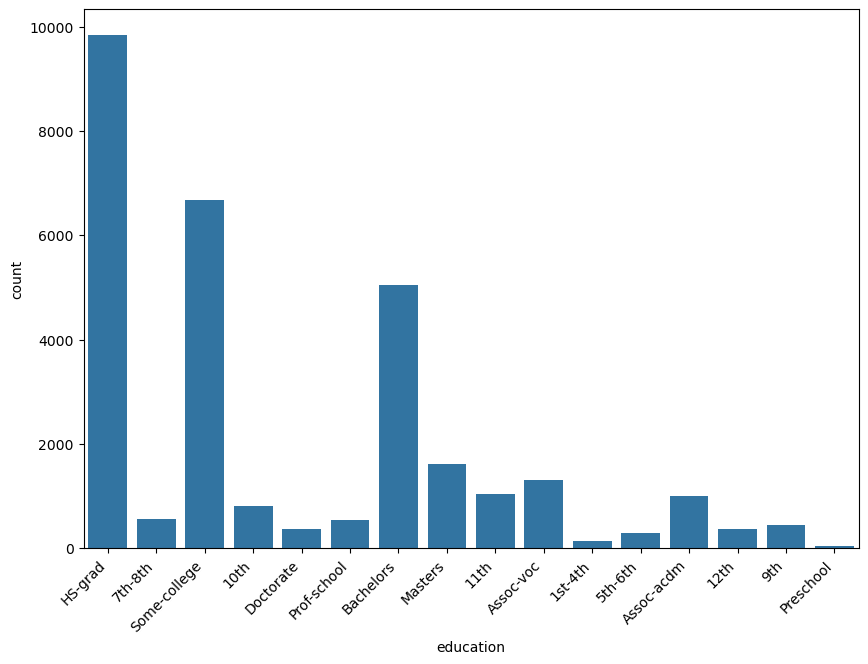

In [16]:
plt.figure(figsize=(10,7))
sns.countplot(x='education',data=df)
plt.xticks(rotation=45,ha='right')
plt.show()

<p>insight- The countplot indicates that HS-Grad is the most common educational level in the dataset, followed by Some College, Bachelor’s, and Master’s degrees. All other educational categories appear in much smaller proportions. This distribution suggests that the population is largely composed of individuals with high school–level education, while higher academic qualifications represent progressively smaller segments of the dataset.</p>

## Stacked Bar plot for visualizing the relation between Age-group and Occupation

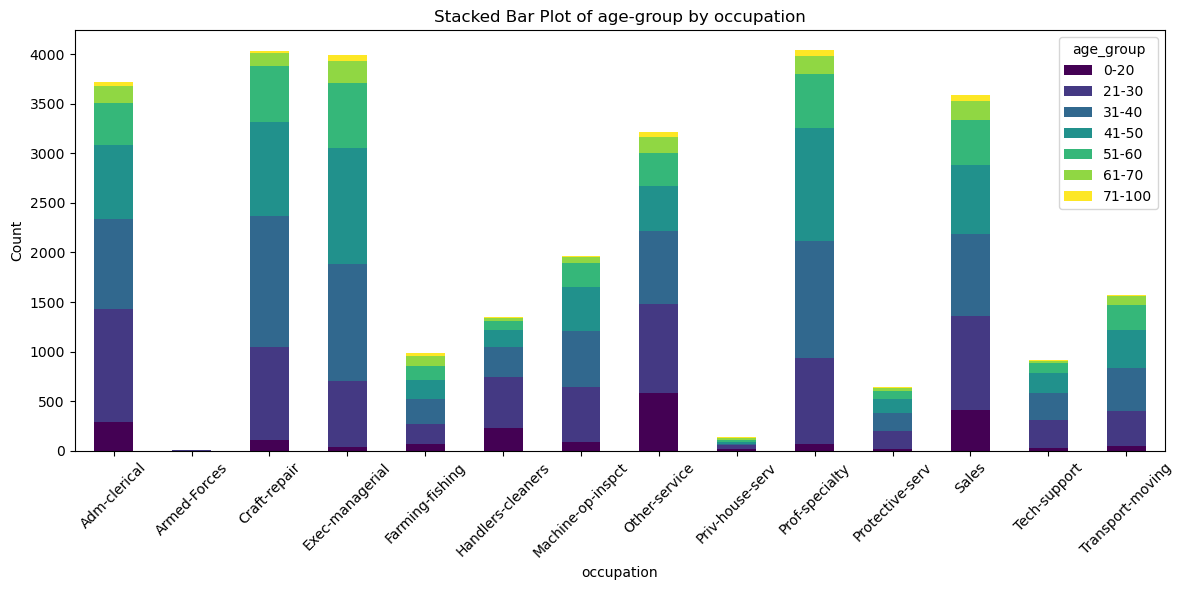

In [17]:
bins_age = [0, 20, 30, 40, 50, 60, 70, 100]  # adjust as needed
labels_age = ['0-20','21-30','31-40','41-50','51-60','61-70','71-100']
df['age_group'] = pd.cut(df['age'], bins=bins_age, labels=labels_age)

age_counts = pd.crosstab(df['occupation'], df['age_group'])

# Plot stacked bar chart
age_counts.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')

plt.title(f'Stacked Bar Plot of age-group by occupation')
plt.xlabel('occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='age_group')
plt.tight_layout()
plt.savefig("plot4.png")
plt.show()

<p>inference- Across almost every occupation, the 21–30, 31–40, and 41–50 age groups form the majority of employees. This suggests that the workforce is largely concentrated in the productive working age range. The plot demonstrates strong age-based clustering in occupations:
Professional & Managerial roles → mid to late career (31–50)
Labor-intensive/Service jobs → younger workers (21–30)
Older groups (>60) → minimal representation
This suggests that experience level and physical demands influence the distribution of age groups across occupations.</p>

## Stacked Bar plot for visualizing the relation between Occupation and Education

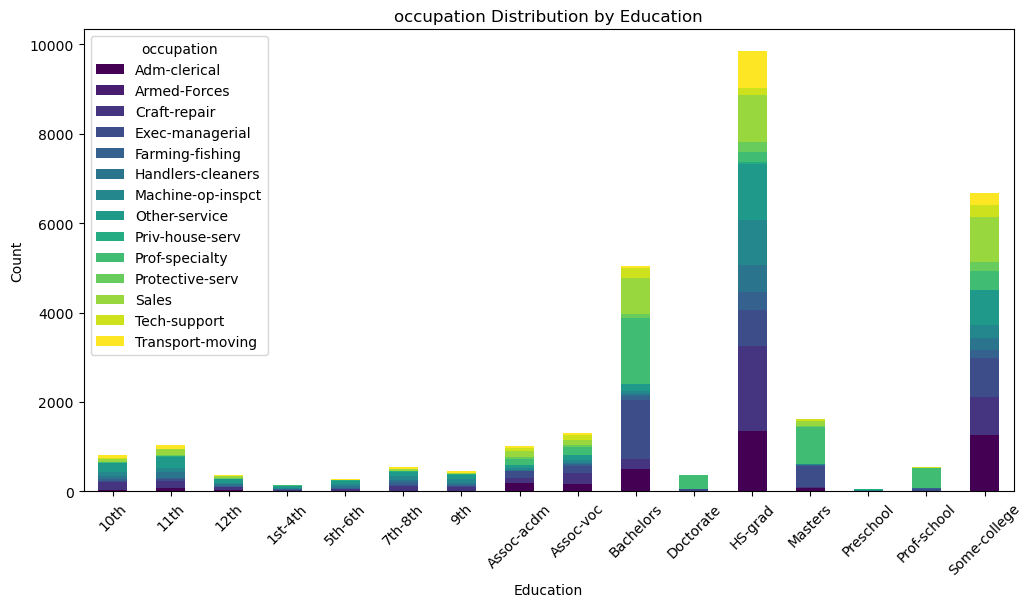

In [18]:
# education v/s occupation
edu_occu = pd.crosstab(df['education'], df['occupation'])
edu_occu.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title('occupation Distribution by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='occupation')
plt.savefig("plt11.png")
plt.show()

<p>inference- Higher education levels are strongly linked to skilled, professional, and managerial occupations, while lower education levels are concentrated in manual labor and service-based roles. HS-grad and Some-college groups form the largest and most diverse part of the workforce. Individuals with Bachelor’s or higher degrees show the widest range of career opportunities, whereas minimal education leads to limited occupational options. This confirms that education significantly influences job type and career pathways.</p>


## Stacked bar plot for visualizing the relation between Educational level and Income

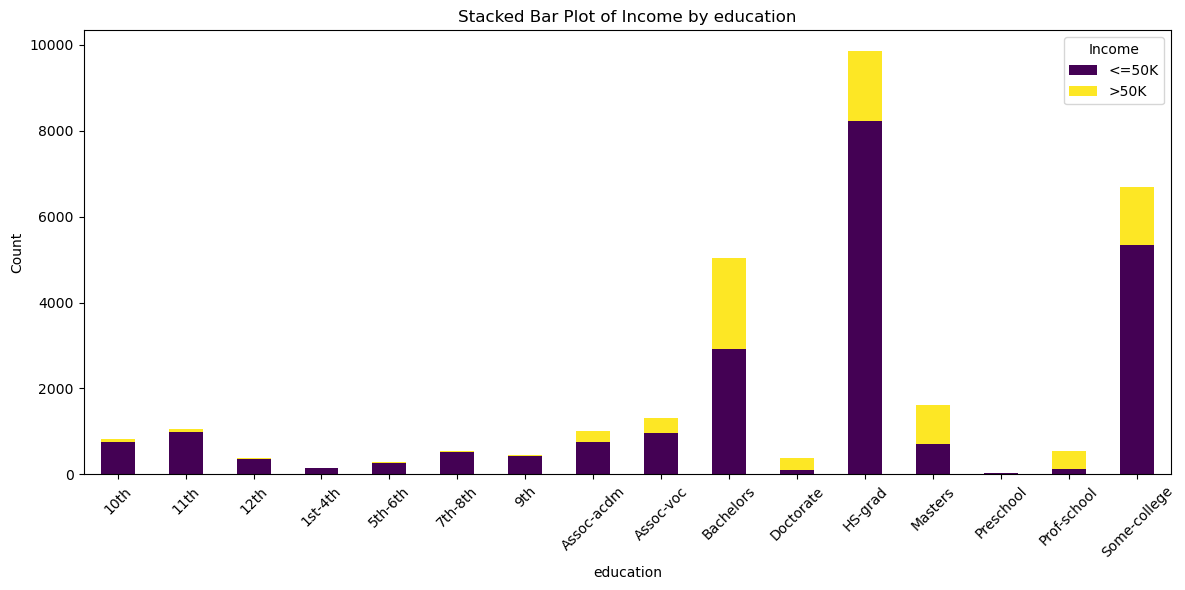

In [19]:
income_counts = pd.crosstab(df['education'], df['income'])

# Plot stacked bar chart
income_counts.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')

plt.title(f'Stacked Bar Plot of Income by education')
plt.xlabel('education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.tight_layout()
plt.show()

<p>insight- The stacked bar plot shows that HS-Grad has the highest number of individuals, and the majority of them fall into the ≤50K income group. A similar pattern is seen for Some College, where most individuals also earn ≤50K. Across all education levels, the lower-income category dominates, indicating that higher education does not necessarily guarantee higher income in this dataset. This suggests a strong concentration of individuals with modest earnings regardless of their educational background.</p>

## Stacked Bar plot for visualizing the relation between Occupation and Income

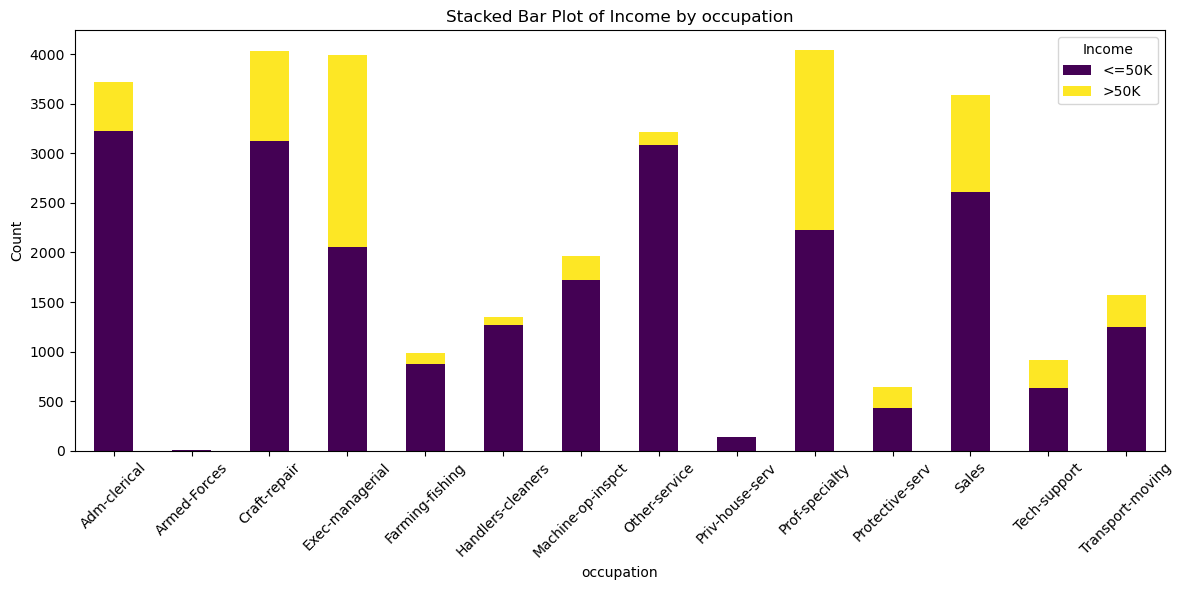

In [20]:
income_counts = pd.crosstab(df['occupation'], df['income'])

# Plot stacked bar chart
income_counts.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')

plt.title(f'Stacked Bar Plot of Income by occupation')
plt.xlabel('occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.tight_layout()
plt.show()

<p>insight- The stacked bar plot shows that Prof-specialty has the highest number of individuals, with the majority earning ≤50K. A similar pattern is observed in Craft-repair and Exec-managerial, which have almost equal counts and are also dominated by the ≤50K income group. This trend continues for Adm-clerical and Sales, where most individuals likewise fall into the lower-income category. Overall, the distribution suggests that across all major occupations, the ≤50K income bracket is predominant, indicating limited variation in income levels despite differences in job roles.</p>

## Boxplot of Hours-per-Week by Workclass

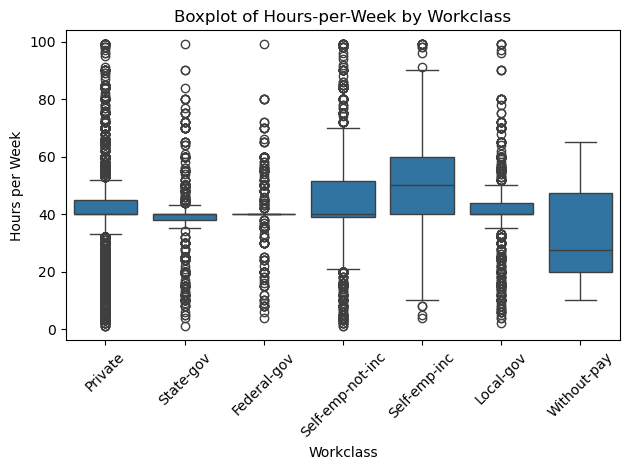

In [21]:
sns.boxplot(x='workclass', y='hours.per.week', data=df)
plt.title('Boxplot of Hours-per-Week by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Hours per Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plot5.png")
plt.show()

<p>inference- Private workclass has the largest spread of data points.Hours range from very low (0–10) to very high (>90). State-gov, Federal-gov, and Local-gov have-Lower variability and Median close to 40 hours. This indicates more structured work schedules and fewer extreme hour values. Many individuals report extremely high hours (70–100), especially in:Private,Self-emp-inc, and Self-emp-not-inc. This indicates a portion of the workforce regularly engages in long workweeks</p>

## Count plot for Income Distribution by Age Group and Hours-per-Week Group

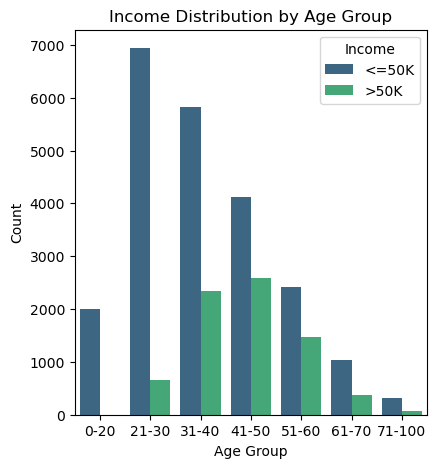

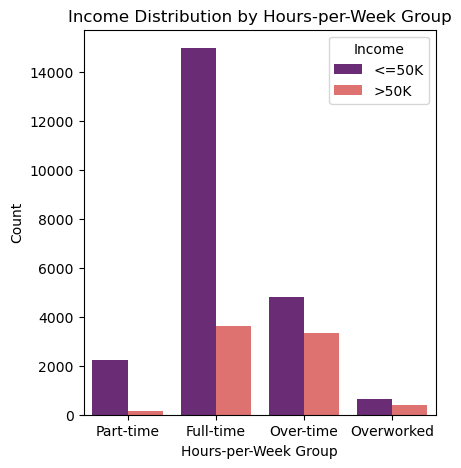

In [25]:
# --- Create age groups ---
bins_age = [0, 20, 30, 40, 50, 60, 70, 100]  # adjust as needed
labels_age = ['0-20','21-30','31-40','41-50','51-60','61-70','71-100']
df['age_group'] = pd.cut(df['age'], bins=bins_age, labels=labels_age)

# --- Create hours-per-week groups ---
bins_hours = [0, 20, 40, 60, 100]  # adjust as needed
labels_hours = ['Part-time','Full-time','Over-time','Overworked']
df['hours_group'] = pd.cut(df['hours.per.week'], bins=bins_hours, labels=labels_hours)

# --- Plot income distribution by age group ---
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='age_group', hue='income', data=df, palette='viridis')
plt.title('Income Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Income')
plt.savefig("plt10.png")
plt.show()

# --- Plot income distribution by hours-per-week group ---
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
sns.countplot(x='hours_group', hue='income', data=df, palette='magma')
plt.title('Income Distribution by Hours-per-Week Group')
plt.xlabel('Hours-per-Week Group')
plt.ylabel('Count')
plt.legend(title='Income')
plt.savefig("plt8.png")
plt.show()


<p>inference- Income distribution by age group shows that Very few individuals below age 30 earn >50K. Income >50K becomes noticeably higher in the 31–40 and 41–50 groups. 0–20 and 21–30 age groups have extremely few >50K earners. After age 51–60, both <=50K and >50K counts drop significantly. Decline continues in 61–70 and 71–100 age groups. 

Income distribution by hours per work plot shows that experience and career progression strongly influence income growth.
The Full-time category has the highest number of individuals. Most of them fall in the <=50K income group. However, among all categories, Full-time also has the highest number of >50K earners. Over-time and Overworked groups show a higher proportion of >50K earners compared to Part-time and Full-time. Very few Part-time workers earn >50K. Not everyone who works very long hours earns high income. Some individuals work excessively but still remain in the <=50K group.</p>

## Bar plot for visualizing relation between Income and Sex and Race

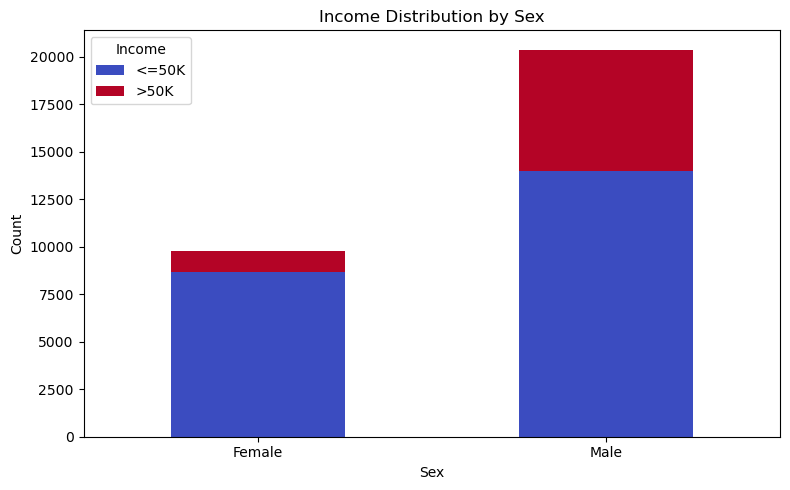

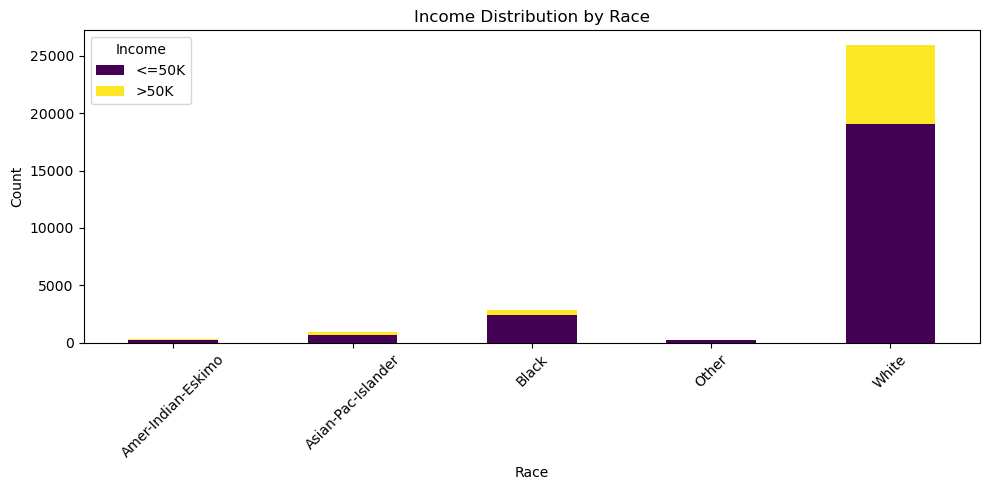

In [26]:
# --- Sex vs Income ---
sex_income = pd.crosstab(df['sex'], df['income'])

# Plot stacked bar chart
sex_income.plot(kind='bar', stacked=True, figsize=(8,5), colormap='coolwarm')
plt.title('Income Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Income')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# --- Race vs Income ---
race_income = pd.crosstab(df['race'], df['income'])

# Plot stacked bar chart
race_income.plot(kind='bar', stacked=True, figsize=(10,5), colormap='viridis')
plt.title('Income Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<p>insight- The bar plot of income distribution by sex shows that males make up a larger portion of the dataset, and the majority of them fall into the ≤50K income group. Although females appear in comparatively smaller numbers, most of them also earn ≤50K. Overall, the plot indicates that regardless of sex, lower income levels dominate, but the imbalance in counts shows that males are more heavily represented in the dataset.

the bar plot of income distribution by race shows that White individuals form the largest racial group in the dataset, and the majority of them earn ≤50K. This pattern is similarly observed among Black and Asian-Pac-Islander groups, where most individuals also fall into the lower-income category. Overall, the distribution indicates that across all major racial groups, the ≤50K income level is dominant, with the dataset being primarily composed of White individuals.</p>

## Violin plot for visualizing the relation between Income and Capital gain and loss

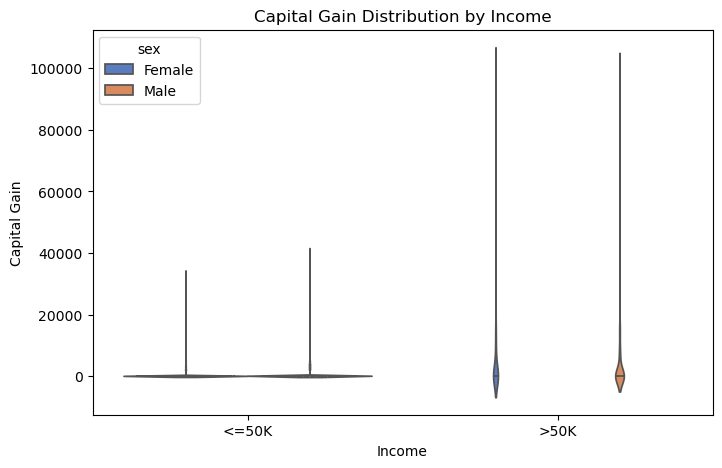

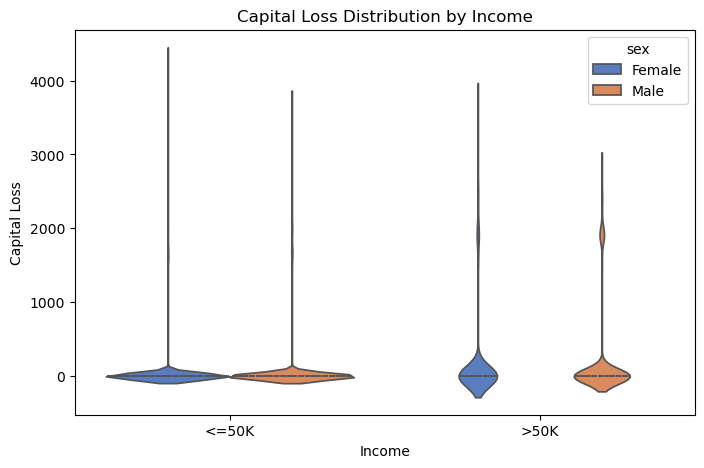

In [29]:
# Capital Gain
plt.figure(figsize=(8,5))
sns.violinplot(x='income', y='capital.gain',hue='sex', data=df, inner='quartile', palette='muted')
plt.title('Capital Gain Distribution by Income')
plt.xlabel('Income')
plt.ylabel('Capital Gain')
plt.show()

# Capital Loss
plt.figure(figsize=(8,5))
sns.violinplot(x='income', y='capital.loss', hue='sex',data=df, inner='quartile', palette='muted')
plt.title('Capital Loss Distribution by Income')
plt.xlabel('Income')
plt.ylabel('Capital Loss')
plt.savefig("plt6.png")
plt.show()


<p>Capital loss is mostly zero
For both income groups (≤50K and >50K) and for both sexes, the distribution is highly concentrated around 0, indicating that the majority of individuals report no capital loss.

Higher income group shows more variability
Individuals earning >50K exhibit a wider spread and higher upper tails of capital loss compared to the ≤50K group. This suggests that higher-income individuals are more likely to incur non-zero and larger capital losses.

Gender differences are minimal
Male and female distributions largely overlap within each income group. This implies gender does not strongly influence capital loss, relative to income.

Presence of extreme values (outliers)
The long thin tails extending to high values indicate few extreme capital loss cases, especially in the >50K group. These are rare but influential observations.

Income is a stronger factor than sex
Overall, income level appears to be more associated with capital loss patterns than sex.</p>

## Stacked bar plot for visualizing the relation between Workclass distribution and Occupation

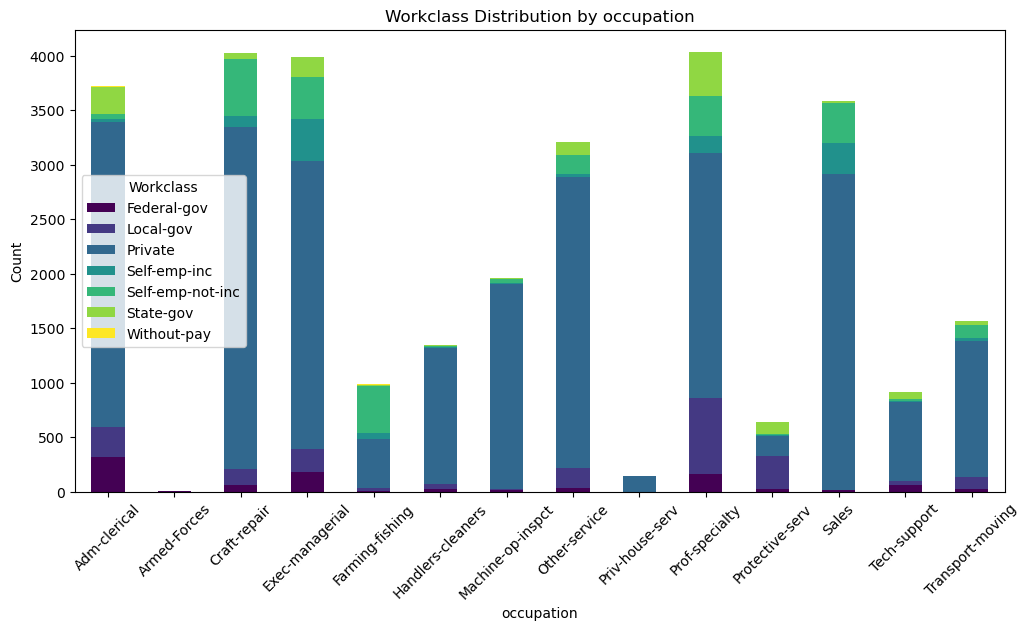

In [30]:
# workclass v/s occupation

edu_work = pd.crosstab(df['occupation'], df['workclass'])
edu_work.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title('Workclass Distribution by occupation')
plt.xlabel('occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Workclass')
plt.show()


<p>insight-The stacked bar plot of workclass distribution by occupation shows that Prof-specialty, Craft-repair, and Exec-managerial are the most represented occupations, and the majority of individuals in these categories belong to the Private workclass. Only a small portion falls under Federal-gov, indicating minimal representation in government roles. This pattern is consistent across other occupations as well, suggesting that the private sector dominates the workforce across nearly all occupational groups, with government workclasses contributing only a small share.</p>

## Bar plot for visualizing relation between Workclass distribution and Education

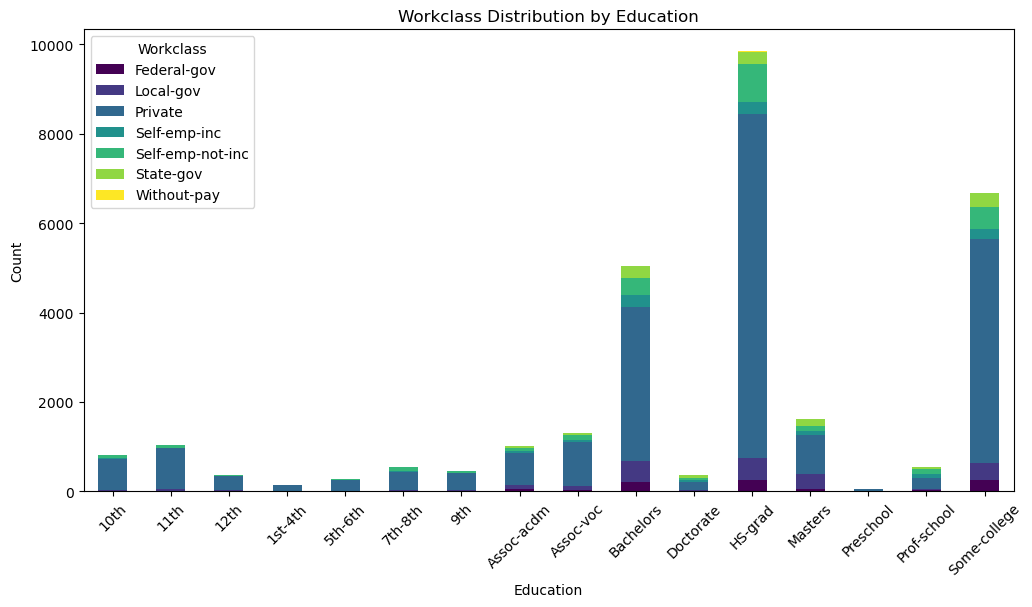

In [34]:
# workclass v/s education

edu_work = pd.crosstab(df['education'], df['workclass'])
edu_work.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title('Workclass Distribution by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Workclass')
plt.savefig("plt7.png")
plt.show()


<p>inference- This stacked bar plot shows how different workclass categories are distributed across various education levels. The Private workclass category forms the largest portion of every education group. Especially large among: HS-grad, Some-college and Bachelors. Higher education increases access to government or self-employed professional roles. HS-grad and Some-college dominate the dataset. These two groups show the largest overall counts, Reflects that most people in the dataset fall in the middle education levels.</p>

## Bar plot for visualizing the relation between Income Distribution by Native Country (Top 10 Countries)

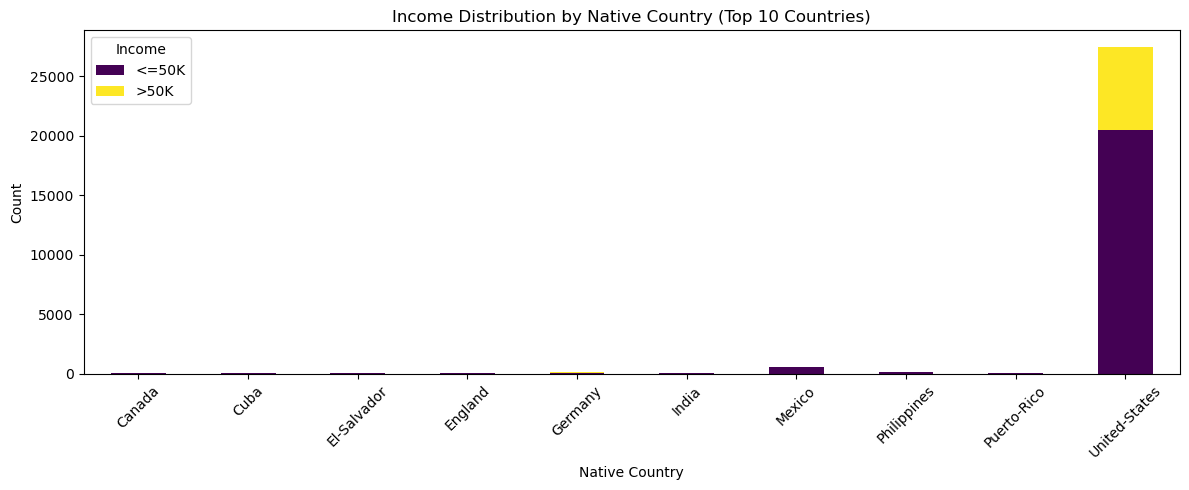

In [32]:
# income v/s native.country

top_n = 10
top_categories = df['native.country'].value_counts().nlargest(top_n).index

# Filter top 10 countries
df_top = df[df['native.country'].isin(top_categories)]

# Crosstab for stacked bar
country_income = pd.crosstab(df_top['native.country'], df_top['income'])

# Plot
country_income.plot(kind='bar', stacked=True, figsize=(12,5), colormap='viridis')
plt.title('Income Distribution by Native Country (Top 10 Countries)')
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.tight_layout()
plt.show()


<p>insight- he stacked bar plot of income distribution by native country shows that the United States has by far the highest representation among the top 10 native countries, and the majority of individuals from the U.S. earn ≤50K. In comparison, all other countries appear with very small counts, and these groups also follow the same pattern, with most individuals earning ≤50K. Overall, the plot highlights that the dataset is heavily dominated by U.S. natives, and across all countries, the lower-income group remains the most common.</p>

## Heatmap showing the correlation

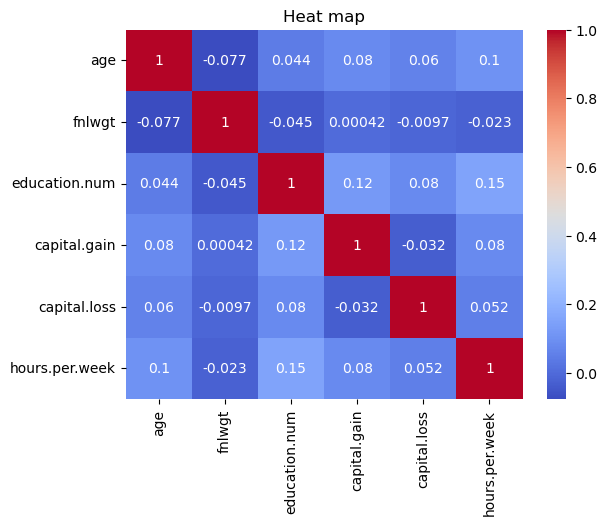

In [33]:
numeric=df.select_dtypes(include=['number'])
corr_matrix=numeric.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Heat map')
plt.show()

<p>insight- The heatmap indicates that all numerical variables exhibit very weak correlations with each other, suggesting minimal linear relationships within the dataset. The strongest observed correlation is between age and fnlwgt, but even this value is only –0.077, which is extremely weak. Overall, the plot suggests that the numerical features are largely independent and do not strongly influence one another in a linear manner.</p>